In [1]:
%%capture
import os
for dirname, _, filename in os.walk("../input"):
  for files in filename:
    print(os.path.join(dirname, files))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2
from tqdm import tqdm_notebook as tqdm

In [3]:
train_data = pd.DataFrame(pd.read_csv("../input/plant-pathology-2020-fgvc7/train.csv"))
test_data = pd.DataFrame(pd.read_csv("../input/plant-pathology-2020-fgvc7/test.csv"))

In [4]:
print("Training data shape : = {}".format(train_data.shape))
print("Test data shape : = {}".format(test_data.shape))

Training data shape : = (1821, 5)
Test data shape : = (1821, 1)


In [5]:
train_data.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [6]:
test_data.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [7]:
image_folder_path = "../input/plant-pathology-2020-fgvc7/images/"

In [8]:
arr = train_data["image_id"]
train_images = [i for i in arr]  

arr = test_data["image_id"]
test_images = [i for i in arr]

In [9]:
def load_image(image_id) : 
  image_path = image_folder_path +image_id +".jpg"
  image = cv2.imread(image_path) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def resize(image):
  image = cv2.resize(image, (800, 800))
  return image

In [10]:
def extract_classes(s):
  """
  s can be either of the four classes mentioned above.
  """ 
  t = train_data[train_data[s] == 1] 
  arr = t["image_id"]
  images = [i for i in tqdm(arr)]
  train_images = [load_image(i) for i in tqdm(images)]
  return train_images

classes = ["healthy", "multiple_diseases", "rust", "scab"] 

In [11]:
count_healthy = len(train_data[train_data["healthy"] == 1])
count_diseased = len(train_data[train_data["multiple_diseases"] == 1])
count_rust = len(train_data[train_data["rust"] == 1])
count_scab = len(train_data[train_data["scab"] == 1])

print(count_healthy)
print(count_diseased)
print(count_rust)
print(count_scab)

516
91
622
592


(-1.1527958829887197,
 1.1533529919548287,
 -1.1585919775752163,
 1.1357509855075638)

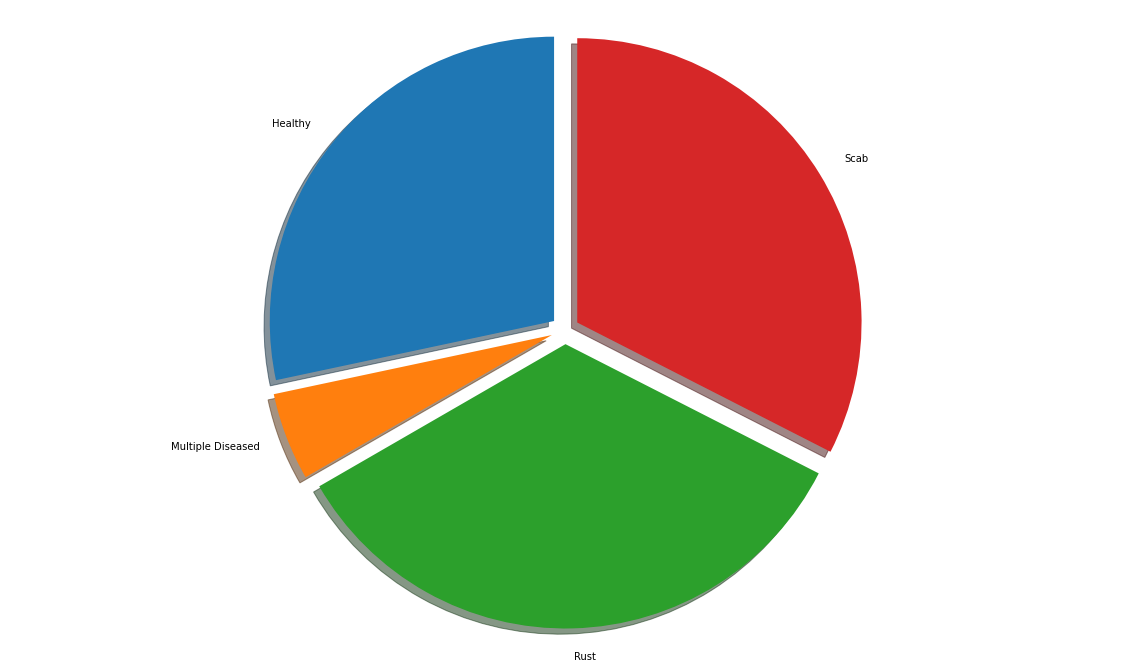

In [12]:
# observe number of cases present in each class
labels = ["Healthy", "Multiple Diseased", "Rust", "Scab"]
counts = [count_healthy, count_diseased, count_rust, count_scab]
explode = (0.05, 0.05, 0.05, 0.05)
fig, ax = plt.subplots(figsize = (20, 12))
ax.pie(counts, explode = explode, labels = labels, shadow = True, startangle = 90)
ax.axis("equal") # equal aspect ratio ensures pie graph is drawn as circle

In [13]:
healthy = extract_classes("healthy")
healthy_image_1 = healthy[100]
healthy_image_2 = healthy[200]
healthy_image_3 = healthy[300]
del healthy # free memory

md = extract_classes("multiple_diseases")
md_image_1 = md[1]
md_image_2 = md[5]
md_image_3 = md[10]
del md # free memory

rust = extract_classes("rust")
rust_image_1 = rust[10]
rust_image_2 = rust[20]
rust_image_3 = rust[30]
del rust # free memory

scab = extract_classes("healthy")
scab_image_1 = scab[10]
scab_image_2 = scab[20]
scab_image_3 = scab[30]
del scab # free memory

image_collection = [healthy_image_1, healthy_image_2, healthy_image_3, 
                   md_image_1, md_image_2, md_image_3,
                   rust_image_1, rust_image_2, rust_image_3,
                   scab_image_1, scab_image_2, scab_image_3]   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


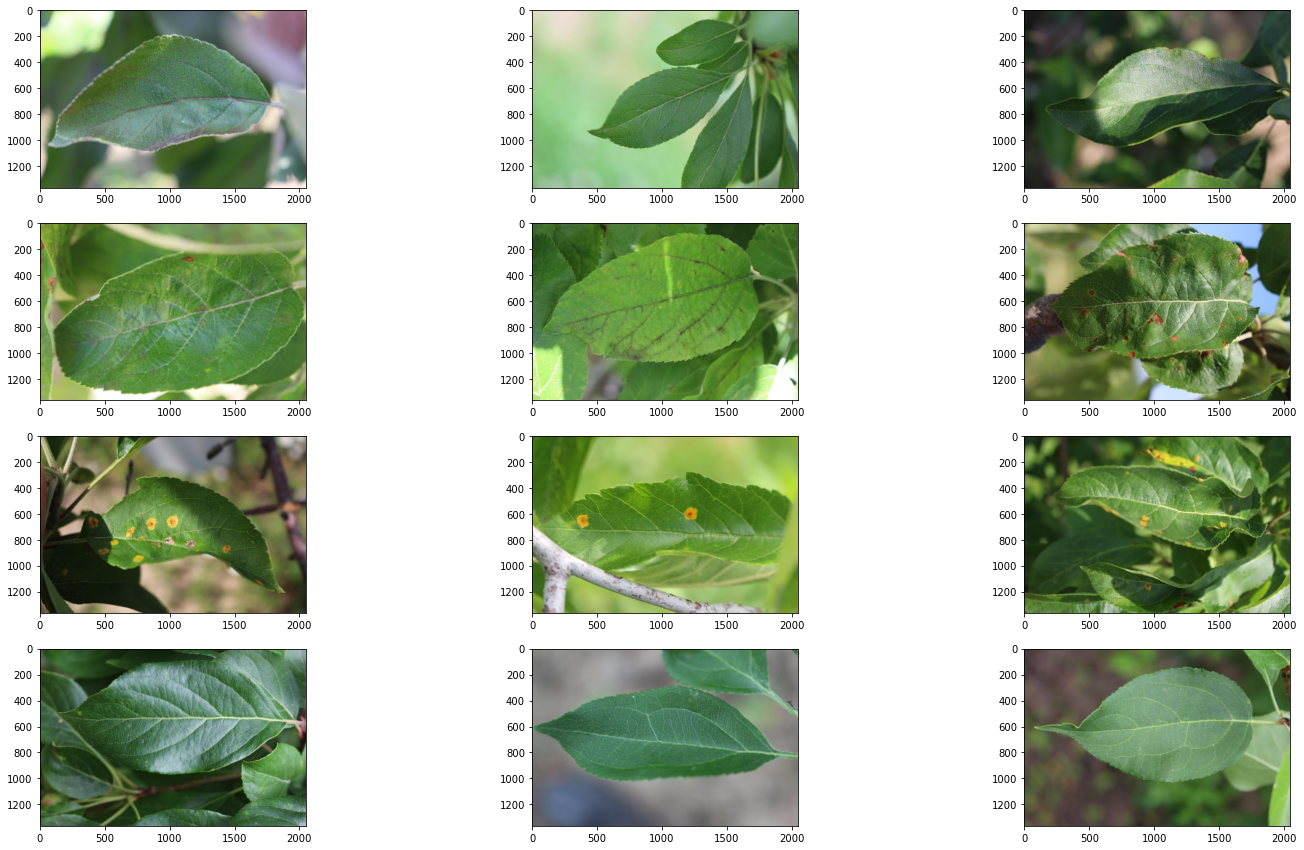

In [14]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (25, 15))
for i in range(12):
    ax[i//3, i%3].imshow(image_collection[i]) 